In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow import keras

2025-08-15 17:29:02.373981: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-15 17:29:02.374278: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-15 17:29:02.416983: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-15 17:29:04.120428: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

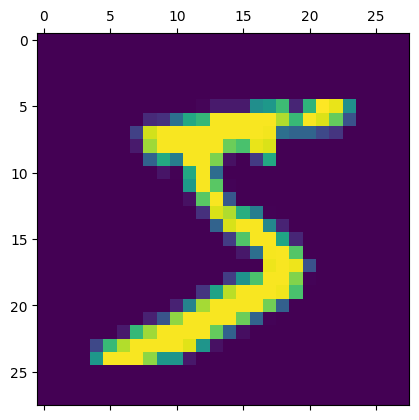

In [4]:
plt.matshow(X_train[0])

In [5]:
X_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [9]:
flattened_train=X_train.reshape(len(X_train),28*28)
flattened_test=X_test.reshape(len(X_test),28*28)

In [10]:
flattened_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(60000, 784))

In [11]:
flattened_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10000, 784))

In [12]:
flattened_train.shape

(60000, 784)

In [13]:
flattened_test.shape

(10000, 784)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-15 17:29:07.521495: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
)

model.fit(flattened_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - accuracy: 0.8781 - loss: 0.4672
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - accuracy: 0.9147 - loss: 0.3040
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.9210 - loss: 0.2836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 843us/step - accuracy: 0.9229 - loss: 0.2733
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9255 - loss: 0.2671


In [16]:
model.evaluate(flattened_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9256 - loss: 0.2683


[0.2682567834854126, 0.925599992275238]

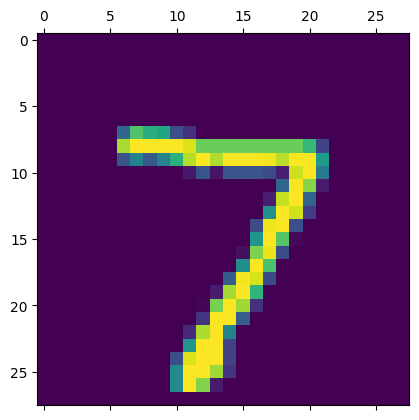

In [17]:
plt.matshow(X_test[0])

In [18]:
y_preds = model.predict(flattened_test)
y_preds[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step


array([3.9747115e-02, 3.7703123e-07, 5.8088727e-02, 9.7070444e-01,
       2.9244022e-03, 1.5517172e-01, 1.5175805e-06, 9.9981558e-01,
       1.2738585e-01, 6.8007135e-01], dtype=float32)

In [19]:
ans=np.argmax(y_preds[0])
ans

np.int64(7)

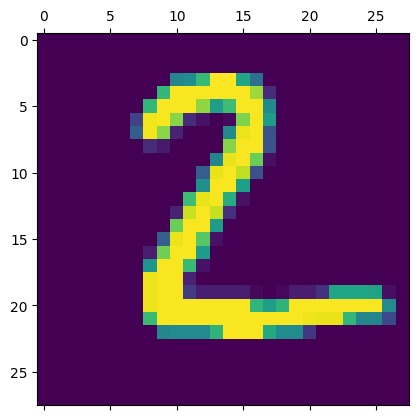

In [20]:
# Predictions
plt.matshow(X_test[1])

In [21]:
pred=np.argmax(y_preds[1])

In [22]:
pred

np.int64(2)

In [23]:
y_preds

array([[3.97471152e-02, 3.77031228e-07, 5.80887273e-02, ...,
        9.99815583e-01, 1.27385855e-01, 6.80071354e-01],
       [4.88491982e-01, 8.47603288e-03, 9.99429166e-01, ...,
        6.13043687e-13, 1.93454340e-01, 3.07347126e-09],
       [3.45588429e-04, 9.93574262e-01, 6.32050633e-01, ...,
        1.30998820e-01, 4.24415171e-01, 4.74387556e-02],
       ...,
       [3.72641557e-06, 4.16729245e-06, 1.09709054e-03, ...,
        2.03614220e-01, 6.54895544e-01, 8.01149130e-01],
       [1.04234394e-04, 1.54830384e-04, 1.40597767e-04, ...,
        3.26791378e-05, 7.35372007e-01, 1.24578510e-04],
       [1.23335095e-02, 5.94590210e-10, 1.78435549e-01, ...,
        1.47978811e-08, 7.30374653e-04, 1.80051507e-06]],
      shape=(10000, 10), dtype=float32)

In [24]:
y_test

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_preds]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [27]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [28]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    6,    2,    4,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   8,    9,  915,   21,    6,    2,   13,   10,   44,    4],
       [   2,    0,   15,  926,    0,   23,    2,    9,   26,    7],
       [   1,    1,    2,    2,  905,    0,   12,    4,   10,   45],
       [   8,    2,    2,   39,    7,  770,   15,    4,   39,    6],
       [   9,    3,    6,    1,    7,   11,  916,    2,    3,    0],
       [   1,    5,   22,   10,    7,    1,    0,  940,    5,   37],
       [   4,    6,    6,   18,    9,   22,    8,   10,  887,    4],
       [   9,    7,    1,   11,   22,    5,    0,   14,   12,  928]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

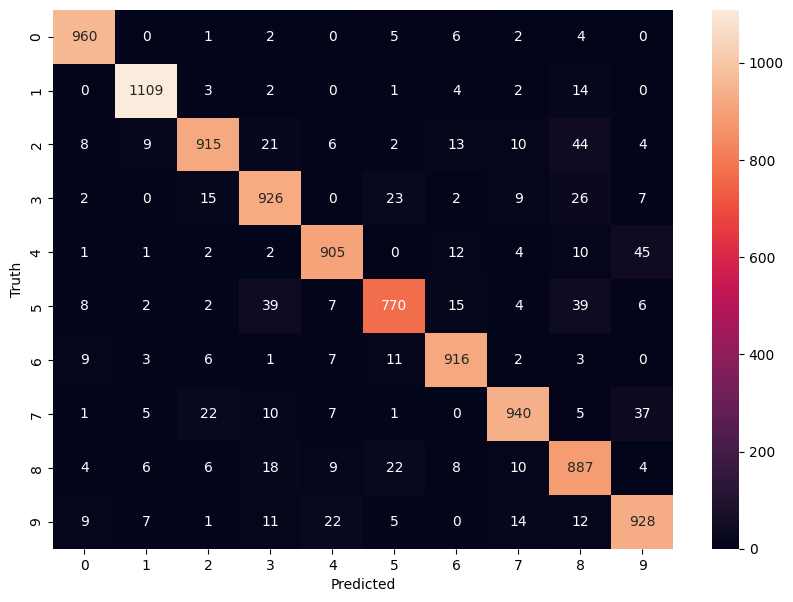

In [29]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
# Adding a hidden layer
model = keras.Sequential([
    # Adding neurons in hidden layer instead of 10 that is hidden layer
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
)

model.fit(flattened_train,y_train,epochs=5)

/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9231 - loss: 0.2703
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9642 - loss: 0.1226
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9744 - loss: 0.0854
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9806 - loss: 0.0649
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9843 - loss: 0.0517


In [44]:
model.evaluate(flattened_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.9783 - loss: 0.0747


[0.07473583519458771, 0.9782999753952026]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step


Text(95.72222222222221, 0.5, 'Truth')

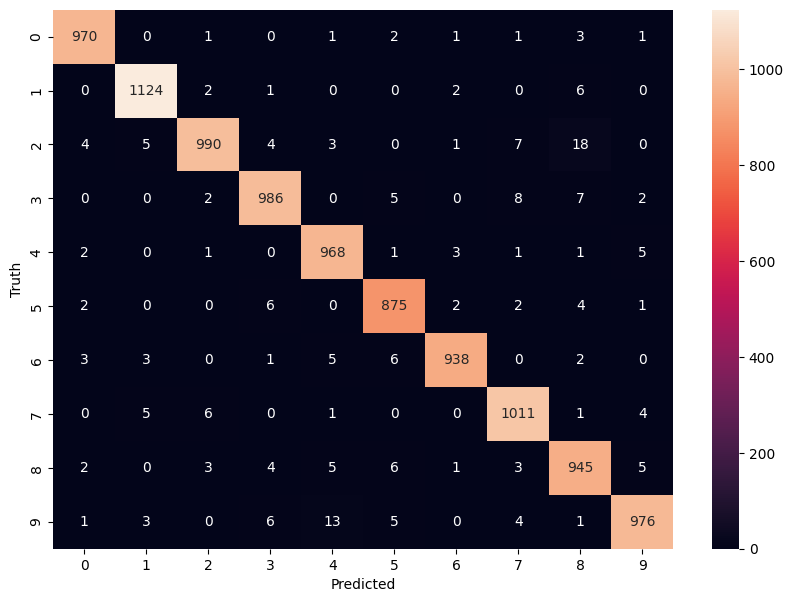

In [47]:
y_predicted=model.predict(flattened_test)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
# You dont need to flatten array all time
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=3)

/media/rahul/280284fc-cb1d-4540-9515-36b722236c05/deeplearning/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9247 - loss: 0.2702
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9632 - loss: 0.1262
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9735 - loss: 0.0881
